In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [2]:
from sklearn.ensemble import RandomForestClassifier
import re
import string
import numpy as np
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
import nltk
from nltk.corpus import stopwords
from string import punctuation
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# nltk.download('stopwords')

In [55]:
df_fake = pd.read_csv("data/Fake.csv")
df_fake["label"] = 0
df_fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [54]:
df_true = pd.read_csv("data/True.csv")
df_true["label"] = 1
df_true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [5]:
df = pd.concat([df_true, df_fake], ignore_index=True, axis=0)

In [6]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
df.shape

(44898, 5)

In [8]:
df.label.value_counts()

0    23481
1    21417
Name: label, dtype: int64

In [9]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [10]:
df.text[1]

'WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition 

In [11]:
df.drop(columns=["title", "subject", "date"], inplace=True)
df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [12]:
def wordopt(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [13]:
df["text"] = df["text"].apply(wordopt)
df.head()

,text,label
0,washington reuters the head of a conservat...,1
1,washington reuters transgender people will...,1
2,washington reuters the special counsel inv...,1
3,washington reuters trump campaign adviser ...,1
4,seattle washington reuters president donal...,1


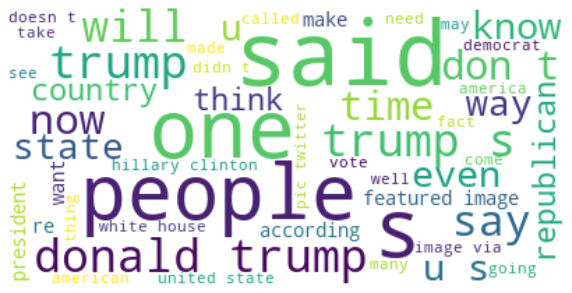

In [14]:
#WordCloud Visualizations
#Method for creating wordclouds

def display_cloud(data,color):
    plt.subplots(figsize=(10,10))
    # mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS, 
                background_color="white", contour_width=2, contour_color=color,
                max_words=50, max_font_size=64,
                random_state=42)
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
display_cloud(df[df['label'] == 0]['text'],'red')

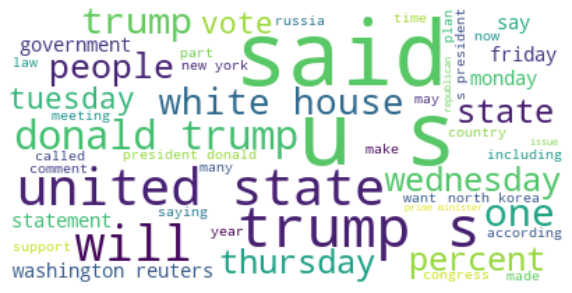

In [15]:
display_cloud(df[df['label'] == 1]['text'],'red')

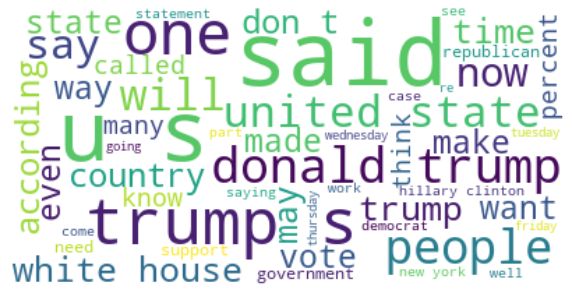

In [16]:
display_cloud(df['text'],'red')

In [17]:
df['text']

0        washington  reuters    the head of a conservat...
1        washington  reuters    transgender people will...
2        washington  reuters    the special counsel inv...
3        washington  reuters    trump campaign adviser ...
4        seattle washington  reuters    president donal...
                               ...                        
44893     century wire says as  reported earlier this w...
44894     century wire says it s a familiar theme  when...
44895    patrick henningsen   century wireremember when...
44896     century wire says al jazeera america will go ...
44897     century wire says as  predicted in its new ye...
Name: text, Length: 44898, dtype: object

In [18]:
vectorized = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
text = vectorized.fit_transform(df["text"])

vocab = vectorized.get_feature_names_out() # vocabulary
vocab[0:10] # 10 kata pertama dari vocabulary

array(['abc', 'abe', 'ability', 'ability to', 'able', 'able to',
       'abortion', 'about', 'about her', 'about his'], dtype=object)

In [19]:
df.text[1]

'washington  reuters    transgender people will be allowed for the first time to enlist in the u s  military starting on monday as ordered by federal courts  the pentagon said on friday  after president donald trump s administration decided not to appeal rulings that blocked his transgender ban  two federal appeals courts  one in washington and one in virginia  last week rejected the administration s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on jan    a justice department official said the administration will not challenge those rulings   the department of defense has announced that it will be releasing an independent study of these issues in the coming weeks  so rather than litigate this interim appeal before that occurs  the administration has decided to wait for dod s study and will continue to defend the president s lawful authority in district court in the meantime   the official said  speaking on condition o

In [20]:

def extract_keywords_tfidf(doc, tfidf, topk=10):
    matrix = tfidf.transform([doc])
    vocab = tfidf.get_feature_names_out()
    keywords = [vocab[index] for index in matrix.toarray()[0].argsort()[-topk:]]
    return keywords

extract_keywords_tfidf(df["text"][1], vectorized)

['in',
 'pentagon',
 'ban',
 'the administration',
 'military',
 'the military',
 'administration',
 'to',
 'the',
 'transgender']

In [21]:
extract_keywords_tfidf(df["text"][2], vectorized)

['of',
 'trump campaign',
 'dossier',
 'links',
 'graham',
 'trump',
 'investigation',
 'russia',
 'the',
 'mueller']

In [22]:
X = df.drop(columns=["label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35918, 1), (8980, 1), (35918,), (8980,))

In [23]:
X_train.head()

,text
14164,paris reuters french bank societe generale...
6909,winston salem n c reuters north carolina...
39608,civil political discourse took a beating in we...
1903,reuters new york and washington state on m...
9141,orlando fla reuters orlando nightclub ki...


In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35918, 1), (8980, 1), (35918,), (8980,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2, stratify=y_test, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7184, 1), (1796, 1), (7184,), (1796,))

In [26]:
X_train.head()

,text
31552,in a city whose former mayor stephanie rawling...
3329,seattle reuters hawaii has become the firs...
7085,mexico city reuters a mexican cement maker...
34269,as a woman i have to say i agree with this do...
9355,washington reuters u s immigration offici...


In [27]:
rsp.svm_poly_params

{'prep__numeric__poly__degree': Integer(low=1, high=3),
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

In [28]:
rsp.svm_params

{'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

In [29]:
# Custom tokenizer that performs preprocessing steps
def custom_tokenizer(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return [word for word in text.split() if word not in sw_eng]

sw_eng = stopwords.words("english") + list(string.punctuation)

pipeline = Pipeline([
    ('text', TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1, 2))),
    ('algo', SVC())
])

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=25, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train["text"], y_train)

print(model.best_params_)
print(model.score(X_train["text"], y_train), model.best_score_, model.score(X_test["text"], y_test))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


D:\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'algo__C': 98.77700294007921, 'algo__gamma': 0.01879466824163846}
1.0 0.9830176229253254 0.984966592427617


In [30]:
pipeline = Pipeline([
    ('text', TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1, 2))),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_iter=25, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train["text"], y_train)

print(model.best_params_)
print(model.score(X_train["text"], y_train), model.best_score_, model.score(X_test["text"], y_test))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


D:\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'algo__C': 493.52962094021177, 'algo__fit_intercept': False}
1.0 0.982600377073512 0.9816258351893096


In [31]:

pipeline = Pipeline([
    ('text', TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1, 2))),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=25, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train["text"], y_train)

print(model.best_params_)
print(model.score(X_train["text"], y_train), model.best_score_, model.score(X_test["text"], y_test))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


D:\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'algo__max_depth': 63, 'algo__max_features': 0.9446974381141753, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 163}
0.9988864142538976 0.9959630577255014 0.994988864142539


In [67]:
text = "Senate Majority Whip John Cornyn (R-TX) thought it would be a good idea to attack Special Counsel Robert Mueller over the Russia probe. As Mueller s noose tightens, Republicans are losing their sh-t and attacking Mueller and the FBI in order to protect probably the most corrupt  president  ever.Former Attorney General Eric Holder tweeted on Friday,  Speaking on behalf of the vast majority of the American people, Republicans in Congress be forewarned: any attempt to remove Bob Mueller will not be tolerated. Cornyn retweeted Holder to say,  You don t. You don t https://t.co/7lHYkIloyz  Senator JohnCornyn (@JohnCornyn) December 16, 2017Bloomberg s Steven Dennis tweeted on Saturday that  [Cornyn] s beef is with Holder, not Mueller,  but Cornyn responded to say,  But Mueller needs to clean house of partisans. But Mueller needs to clean house of partisans https://t.co/g8SwgAKtfH  Senator JohnCornyn (@JohnCornyn) December 16, 2017The Washington Post s Greg Sargent asked Cornyn,  Will you accept the findings of the Mueller probe as legitimate, @JohnCornyn? Makes sense to me to wait to see what they are first,  Cornyn responded.Makes sense to me to wait to see what they are first https://t.co/9lCqpYujKN  Senator JohnCornyn (@JohnCornyn) December 16, 2017Republicans are trying to discredit Mueller and Twitter users took notice.If you even THINK of firing Mueller I ll make it my life s mission to make sure this is your last term, buddy.  Mrs. SMH (@MRSSMH2) December 16, 2017Carrollton, TX here Ready and willing to help get Cruz and Cornyn out  Jules012 (@JulesLorey1) December 16, 2017Garland, TX here Same! Bye Bye   TDK (@ejkmom1998) December 16, 2017Austin, TX. #IStandWithMueller. Cronyn is a fake representative. He represents his own interests and anything to profit himself  Vj (@Tex92eye) December 16, 2017I stand with Mueller!   Kenneth Shipp (@shipp_kenneth) December 16, 2017He speaks for me Its BS how you cover up for a Russia pawn If Trump not gulity why would Mueller be fired to cover up  Ellen Reeher Morris (@EllenMorris1222) December 16, 2017@EricHolder speaks for 69% of Americans according to recent polling. That s  vast majority  in my book. You were around for the Saturday Night Massacre @JohnCornyn. Firing Mueller would be X100!  Lori Winters (@LoriW66) December 16, 2017Country over party. pic.twitter.com/NXEX9rGBgu  PittieBoo (@PittieBoo) December 16, 2017He speaks for me, @JohnCornyn , and he speaks for the vast majority of American citizens who, you should remember, vote. See you in 2018.  Andrew Silver (@standsagreenoak) December 16, 2017I might just move to Texas to get those cronies tossed out of office. Blue wave is coming for the corrupt.  Ollie (@marciebp) December 16, 2017Good try, John. History will not be kind to you.Photo by Ann Heisenfelt/Getty Images"

df_pred = pd.DataFrame({"text": [text]})
df_pred.head()

,text
0,Senate Majority Whip John Cornyn (R-TX) though...


In [68]:
model.predict(df_pred["text"])

array([0], dtype=int64)

In [69]:
text = '''"NEW YORK (Reuters) - The U.S. Justice Department has issued new guidelines for immigration judges that remove some instructions for how to protect unaccompanied juveniles appearing in their courtrooms. A Dec. 20 memo, issued by the Executive Office for Immigration Review (EOIR) replaces 2007 guidelines, spelling out policies and procedures judges should follow in dealing with children who crossed the border illegally alone and face possible deportation.  The new memo removes suggestions contained in the 2007 memo for how to conduct â€œchild-sensitive questioningâ€ and adds reminders to judges to maintain â€œimpartialityâ€ even though â€œjuvenile cases may present sympathetic allegations.â€ The new document also changes the word â€œchildâ€ to â€œunmarried individual under the age of 18â€ in many instances. (Link to comparison: tmsnrt.rs/2BlT0VK May 2007 document: tmsnrt.rs/2BBR8wj December 2017 document: tmsnrt.rs/2C2sWCs)  An EOIR official said the new memo contained â€œclarifications and updatesâ€ to 10-year-old guidance â€œin order to be consistent with the laws as theyâ€™ve been passed by Congress.â€ The new memo was posted on the Justice Department website but has not been previously reported.  Immigration advocates said they worry the new guidelines could make court appearances for children more difficult, and a spokeswoman for the union representing immigration judges said judges are concerned about the tone of the memo. President Donald Trump has made tougher immigration enforcement a key policy goal of his administration, and has focused particularly on trying to curb the illegal entry of children. The administration says it wants to prevent vulnerable juveniles from making perilous journeys to the United States and eliminate fraud from programs for young immigrants.  One changed section of the memo focuses on how to make children comfortable in the court in advance of hearings. The old guidance says they â€œshould be permitted to exploreâ€ courtrooms and allowed to â€œsit in all locations, (including, especially, the judgeâ€™s bench and the witness stand).â€  The new guidance says such explorations should take place only â€œto the extent that resources and time permitâ€ and specifically puts the judgeâ€™s bench off limits. The new memo also warns judges to be skeptical, since an unaccompanied minor â€œgenerally receives more favorable treatment under the law than other categories of illegal aliens,â€ which creates â€œan incentive to misrepresent accompaniment status or age in order to attempt to qualify for the benefits.â€ It also says to be on the lookout for â€œfraud and abuse,â€ language that was not in the previous memo. Immigration judges are appointed by the U.S. Attorney General and courts are part of the Department of Justice, not an independent branch. The only sitting immigration judges routinely allowed to speak to the media are representatives of their union, the National Association of Immigration Judges.  Dana Marks, a sitting judge and spokeswoman for the union, said the â€œoverall toneâ€ of the memo â€œis very distressing and concerning to immigration judges.â€  â€œThere is a feeling that the immigration courts are just being demoted into immigration enforcement offices, rather than neutral arbiters,â€ Marks said. â€œThere has been a relentless beating of the drum toward enforcement rather than due process.â€   Former immigration judge Andrew Arthur, who now works at the Center for Immigration Studies, which promotes lower levels of immigration overall, said the new guidelines were needed.  In their previous form, he said, â€œso much emphasis was placed on the potential inability of the alien to understand the proceedings ... that it almost put the judge into the position of being an advocate.â€Â   The courts have had to handle a surge in cases for unaccompanied minors, mostly from Central America, after their numbers sky-rocketed in 2014 as violence in the region caused residents to flee north.  While illegal crossings initially fell after Trump took office, U.S. Customs and Border Protection said that since May, each month has seen an increase in children being apprehended either alone or with family members.  Attorney General Jeff Sessions said in a speech in Boston in September that the special accommodations for unaccompanied minors had been exploited by â€œgang members who come to this country as wolves in sheep clothing.â€ Echoing some of these concerns, the new memo notes in a preamble that not all child cases involve innocents, and that the courts might see â€œan adolescent gang memberâ€ or â€œa teenager convicted as an adult for serious criminal activity.â€  Jennifer Podkul, policy director of Kids in Need of Defense (KIND) said Congress included special procedural protections for immigrant children in a 2008 anti-trafficking bill to â€œmake sure that a kid gets a fair shot in the courtroom.â€ â€œThese kids are by themselves telling a very complicated and oftentimes very traumatic story,â€ said Podkul. â€œThe approach of this memo, which is much more suspicious, is not going to help get to the truth of a childâ€™s story.â€  In cases where children are called to testify, the old guidance instructed judges to â€œseek to limit the amount of time the child is on the stand.â€ The new guidance says that judges should â€œconsiderâ€ limiting the childâ€™s time on the stand â€œwithout compromising due process for the opposing party,â€ which is generally a government prosecutor. The memo leaves in a range of special accommodations made for children, including allowing them to bring a pillow or booster seat or a â€œtoy, book, or other personal item.â€ It also maintains that cases involving unaccompanied minors should be heard on a separate docket when possible and that children should not be detained or transported with adults'''

df_pred = pd.DataFrame({"text": [text]})
df_pred.head()

,text
0,"""NEW YORK (Reuters) - The U.S. Justice Departm..."


In [70]:
model.predict(df_pred["text"])

array([1], dtype=int64)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test["text"])
y_pred_train = model.predict(X_train["text"])

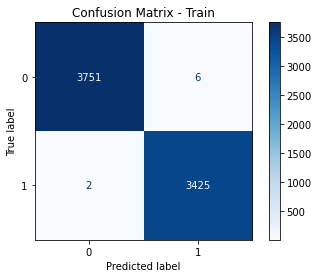

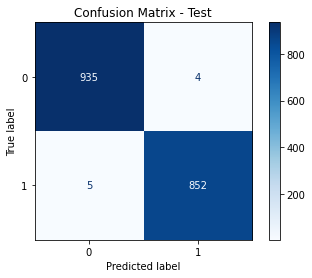

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3757
           1       1.00      1.00      1.00      3427

    accuracy                           1.00      7184
   macro avg       1.00      1.00      1.00      7184
weighted avg       1.00      1.00      1.00      7184
 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       939
           1       1.00      0.99      0.99       857

    accuracy                           0.99      1796
   macro avg       1.00      0.99      0.99      1796
weighted avg       0.99      0.99      0.99      1796
 



In [72]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
disp.plot(cmap='Blues', include_values=True, values_format='d')
plt.title("Confusion Matrix - Train")
plt.show()


cm_test = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot(cmap='Blues', include_values=True, values_format='d')
plt.title("Confusion Matrix - Test")
plt.show()



print(classification_report(y_train,y_pred_train), "\n")
print(classification_report(y_test, y_pred), "\n")

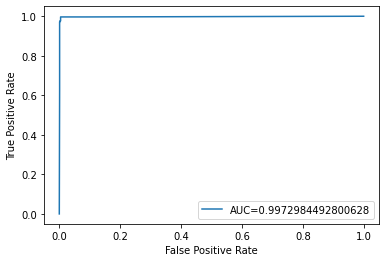

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve

#define metrics
y_pred_proba = model.predict_proba(X_test["text"])[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [77]:
import lime.lime_text

In [87]:
# Create a LIME explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=["Real News", "Fake News"])

# Select a single text data point for explanation (you can modify the index)
text_to_explain = df["text"].iloc[0]

# Explain the model's prediction for the selected data point
explanation = explainer.explain_instance(text_to_explain, model.predict_proba, num_features=6)

# Display the explanation
explanation.show_in_notebook(text=True)

In [90]:
# Create a LIME explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=["Real News", "Fake News"])

# Select a single text data point for explanation (you can modify the index)
text_to_explain = df["text"].iloc[21868]

# Explain the model's prediction for the selected data point
explanation = explainer.explain_instance(text_to_explain, model.predict_proba, num_features=6)

# Display the explanation
explanation.show_in_notebook(text=True)

In [91]:
# import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [92]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)

In [1]:
# explainer = shap.Explainer(model)

# # Select a single text data point for explanation (you can modify the index)
# text_to_explain = df["text"].iloc[0]

# # Get the SHAP values for the selected data point
# shap_values = explainer(text_to_explain)

# # Display the SHAP summary plot
# shap.summary_plot(shap_values, X_test, feature_names=vectorizer.get_feature_names_out())